In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
# Load datasets (use your own paths)
mh_precip = pd.read_csv("../data/raw/MH_precipitation.csv")
mh_temp = pd.read_csv("../data/raw/MH_temperature.csv")
mp_precip = pd.read_csv("../data/raw/MP_precipitation.csv")
mp_temp = pd.read_csv("../data/raw/MP_temperature.csv")

# Convert date columns to datetime
for df in [mh_precip, mh_temp, mp_precip, mp_temp]:
    df['date'] = pd.to_datetime(df['date'])

### Climate Resilience Indicators

- **Rainfall Variability Index (RVI):**  
  A higher RVI suggests greater dependence on irrigation infrastructure.

- **Heat Stress Days (>35°C):**  
  Acts as a proxy for cooling or greenhouse technology needs to protect crops.

- **Drought Frequency:**  
  Indicates vulnerability due to recurring water scarcity and highlights the need for water management strategies.

In [5]:
# 1. Rainfall Variability Index (RVI)
def rainfall_variability_index(df):
    df['year'] = df['date'].dt.year
    annual_rain = df.groupby('year')['rainfall_mm'].sum()
    return annual_rain.std() / annual_rain.mean(), annual_rain

# 2. Heat Stress Days (days with max temperature > 35°C)
def heat_stress_days(df, threshold=35):
    return (df['max'] > threshold).sum()

# 3. Drought Frequency (years with rainfall < 80% of mean)
def drought_frequency(annual_rain):
    mean_rain = annual_rain.mean()
    drought_years = (annual_rain < 0.8 * mean_rain).sum()
    return drought_years

# --- Step 3: Calculate Metrics for Maharashtra ---
mh_rvi, mh_annual_rain = rainfall_variability_index(mh_precip)
mh_heat_stress = heat_stress_days(mh_temp)
mh_droughts = drought_frequency(mh_annual_rain)

# --- Step 4: Calculate Metrics for Madhya Pradesh ---
mp_rvi, mp_annual_rain = rainfall_variability_index(mp_precip)
mp_heat_stress = heat_stress_days(mp_temp)
mp_droughts = drought_frequency(mp_annual_rain)

# --- Step 5: Create Report ---
proxy_report = pd.DataFrame({
    "State": ["Maharashtra", "Madhya Pradesh"],
    "Rainfall Variability Index (RVI)": [mh_rvi, mp_rvi],
    "Heat Stress Days (>35°C)": [mh_heat_stress, mp_heat_stress],
    "Drought Frequency (Years)": [mh_droughts, mp_droughts]
})

# Display the report
print("Climate Resilience Proxy Report:\n", proxy_report)

Climate Resilience Proxy Report:
             State  Rainfall Variability Index (RVI)  Heat Stress Days (>35°C)  \
0     Maharashtra                          1.151808                     95034   
1  Madhya Pradesh                          0.354822                    141687   

   Drought Frequency (Years)  
0                          9  
1                          3  


In [4]:
def climate_resilience_indicators(precip_df, temp_df):
    # Rainfall Variability Index
    precip_df['year'] = precip_df['date'].dt.year
    annual_rain = precip_df.groupby('year')['rainfall_mm'].sum()
    rvi = float(annual_rain.std() / annual_rain.mean())
    
    # Drought frequency
    drought_years = int((annual_rain < 0.8 * annual_rain.mean()).sum())
    
    # Extreme rainfall events
    extreme_events = int((precip_df['rainfall_mm'] > 100).sum())
    
    # Heat stress days
    heat_stress_days = int((temp_df['max'] > 35).sum())
    
    return {
        'Rainfall Variability Index': round(rvi, 3),  # Rounded to 3 decimals
        'Drought Frequency (Years)': drought_years,
        'Extreme Rainfall Events': extreme_events,
        'Heat Stress Days': heat_stress_days
    }

mh_indicators = climate_resilience_indicators(mh_precip, mh_temp)
mp_indicators = climate_resilience_indicators(mp_precip, mp_temp)

print("Maharashtra Indicators:", mh_indicators)
print("Madhya Pradesh Indicators:", mp_indicators)

Maharashtra Indicators: {'Rainfall Variability Index': 1.152, 'Drought Frequency (Years)': 9, 'Extreme Rainfall Events': 5277, 'Heat Stress Days': 95034}
Madhya Pradesh Indicators: {'Rainfall Variability Index': 0.355, 'Drought Frequency (Years)': 3, 'Extreme Rainfall Events': 8632, 'Heat Stress Days': 141687}


### Outputs and Visualizations

- **A table summarizing RVI, Heat Stress Days, and Drought Frequency.**  
  This table provides a comparative view of key climate resilience indicators for Maharashtra and Madhya Pradesh.

- **Trend plots of annual rainfall for both states.**  
  Visualizes rainfall patterns over the years, highlighting drought and excess rainfall periods.

- **Bar charts for RVI, drought frequency, and heat stress days.**  
  Offers a quick comparison of climate variability and stress factors across states.

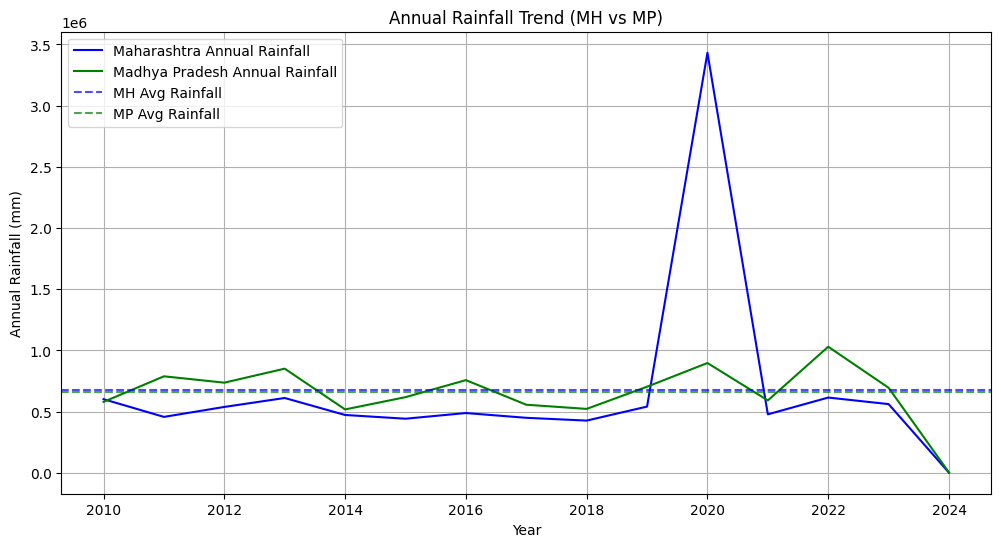

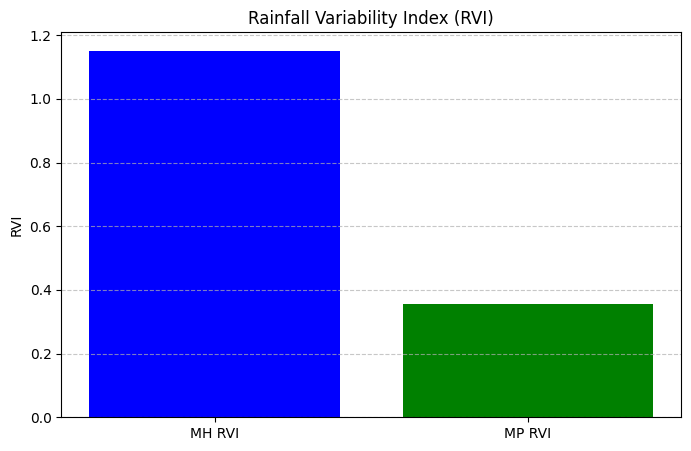

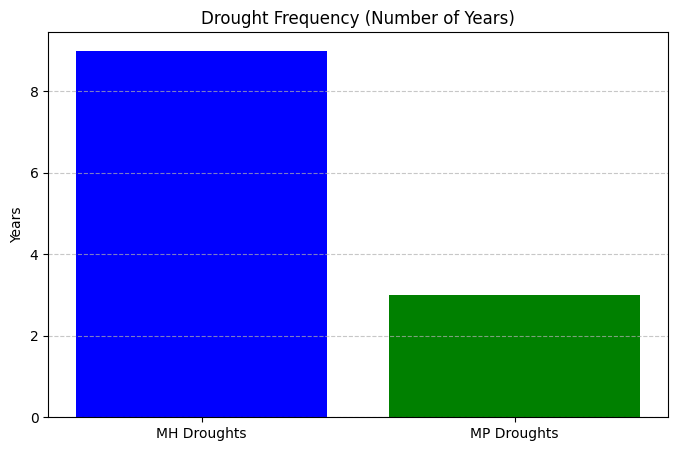

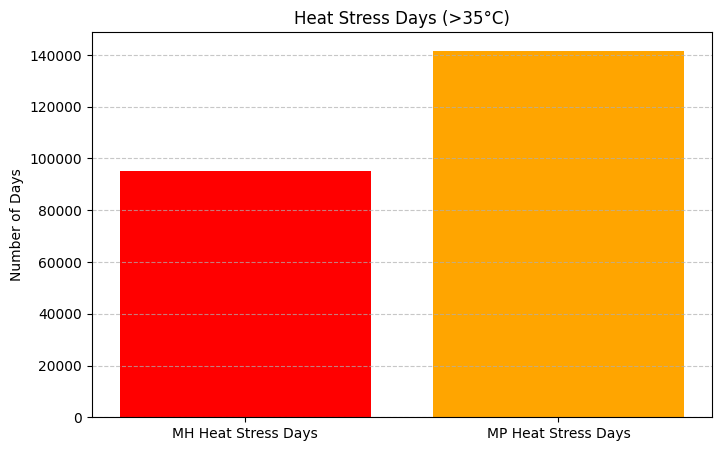

In [6]:
# --- Step 6: Visualizations ---

# 1. Annual Rainfall Trend
plt.figure(figsize=(12, 6))
plt.plot(mh_annual_rain.index, mh_annual_rain.values, label="Maharashtra Annual Rainfall", color='blue')
plt.plot(mp_annual_rain.index, mp_annual_rain.values, label="Madhya Pradesh Annual Rainfall", color='green')
plt.axhline(mh_annual_rain.mean(), color='blue', linestyle='--', alpha=0.7, label="MH Avg Rainfall")
plt.axhline(mp_annual_rain.mean(), color='green', linestyle='--', alpha=0.7, label="MP Avg Rainfall")
plt.title("Annual Rainfall Trend (MH vs MP)")
plt.xlabel("Year")
plt.ylabel("Annual Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.show()

# 2. Rainfall Variability and Drought Frequency (Bar Chart)
plt.figure(figsize=(8, 5))
plt.bar(["MH RVI", "MP RVI"], [mh_rvi, mp_rvi], color=['blue', 'green'])
plt.title("Rainfall Variability Index (RVI)")
plt.ylabel("RVI")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(["MH Droughts", "MP Droughts"], [mh_droughts, mp_droughts], color=['blue', 'green'])
plt.title("Drought Frequency (Number of Years)")
plt.ylabel("Years")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Heat Stress Days (Bar Chart)
plt.figure(figsize=(8, 5))
plt.bar(["MH Heat Stress Days", "MP Heat Stress Days"], [mh_heat_stress, mp_heat_stress], color=['red', 'orange'])
plt.title("Heat Stress Days (>35°C)")
plt.ylabel("Number of Days")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()